## 시장데이터 가져오기

In [4]:
#!pip install pandas-datareader
import pandas_datareader as pdr
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [5]:
snp = fdr.DataReader('US500')
snp = np.log(snp.Close) - np.log(snp.Close.shift(1))
snp_ret = snp.dropna() * 100
snp_ret.name = 'snp_ret'

In [6]:
snp_ret.describe()

count    10792.000000
mean         0.032457
std          1.139751
min        -22.917515
25%         -0.455550
50%          0.057544
75%          0.569480
max         10.957196
Name: snp_ret, dtype: float64

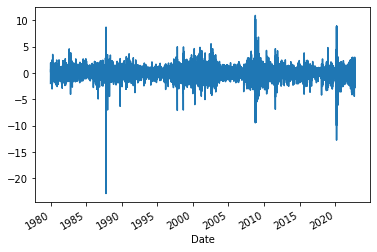

In [7]:
snp_ret.plot()
plt.show()

## Fama-French 5 factor model

In [8]:
import pandas_datareader.famafrench as ff

#famafrench 데이터셋 확인하기
datasets = ff.get_available_datasets()
len(datasets)

297

In [9]:
ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', '2006')[0]
ff5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2006-01-03,1.50,-0.15,0.16,0.18,-0.32,0.017
2006-01-04,0.46,0.31,0.03,-0.44,0.33,0.017
2006-01-05,0.03,0.23,-0.10,-0.55,0.20,0.017
2006-01-06,0.92,0.10,-0.24,-0.04,0.14,0.017
2006-01-09,0.45,0.51,-0.17,0.06,-0.03,0.017
...,...,...,...,...,...,...
2022-08-25,1.45,0.14,-0.01,0.12,-0.41,0.008
2022-08-26,-3.38,-0.28,1.69,0.24,0.87,0.008
2022-08-29,-0.72,-0.38,0.42,0.23,0.42,0.008


In [10]:
ff5.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,0.039871,0.002639,-0.004188,0.014784,0.005104,0.004018
std,1.276623,0.633801,0.830243,0.446258,0.367642,0.006089
min,-12.000000,-4.560000,-5.000000,-2.720000,-2.260000,0.000000
25%,-0.420000,-0.355000,-0.350000,-0.220000,-0.190000,0.000000
50%,0.080000,0.000000,-0.030000,0.010000,-0.010000,0.001000
75%,0.600000,0.355000,0.310000,0.240000,0.190000,0.007000
max,11.350000,5.730000,6.740000,4.210000,2.460000,0.022000


### 팩터별 상관계수

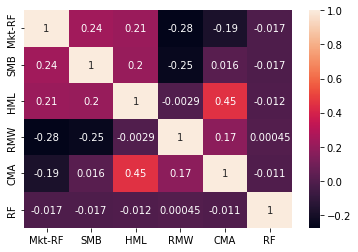

In [11]:
import seaborn as sns
sns.heatmap(ff5.corr(), annot=True)
plt.show()

### 팩터별 누적수익률

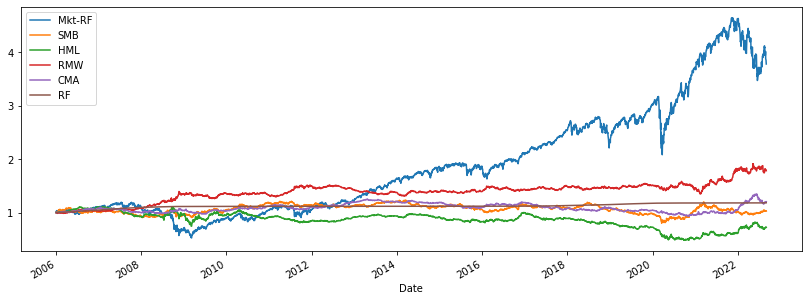

In [12]:
(1 + ff5/100).cumprod().plot(figsize=(14,5))
plt.show()

In [13]:
df = pd.concat([ff5, snp_ret], axis=1).dropna()
df

,Mkt-RF,SMB,HML,RMW,CMA,RF,snp_ret
Date,,,,,,,
2006-01-03,1.50,-0.15,0.16,0.18,-0.32,0.017,1.628895
2006-01-04,0.46,0.31,0.03,-0.44,0.33,0.017,0.366603
2006-01-05,0.03,0.23,-0.10,-0.55,0.20,0.017,0.001571
2006-01-06,0.92,0.10,-0.24,-0.04,0.14,0.017,0.935554
2006-01-09,0.45,0.51,-0.17,0.06,-0.03,0.017,0.364964
...,...,...,...,...,...,...,...
2022-08-25,1.45,0.14,-0.01,0.12,-0.41,0.008,1.399322
2022-08-26,-3.38,-0.28,1.69,0.24,0.87,0.008,-3.426853
2022-08-29,-0.72,-0.38,0.42,0.23,0.42,0.008,-0.668872


## 회귀분석

In [14]:
df['snp-rf'] = df.snp_ret - df.RF
y = df['snp-rf']
X = df[['Mkt-RF','SMB','HML','RMW','CMA']]
X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 snp-rf   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.194e+05
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:01:33   Log-Likelihood:                 5527.6
No. Observations:                4195   AIC:                        -1.104e+04
Df Residuals:                    4189   BIC:                        -1.101e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0174      0.001    -17.333      0.000      -0.019      -0.015
Mkt-RF         1.0066      0.001   1143.672      0.000       1.005       1.008
SMB           -0.1211      0.002    -71.868      0.000      -0.124      -0.118
HML            0.0331      0.001     22.824      0.000       0.030       0.036
RMW            0.0681      0.002     28.286      0.000       0.063       0.073
CMA            0.0335      0.003     10.335      0.000       0.027       0.040
==============================================================================
Omnibus:                     2278.476   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74864.513
Skew:                          -1.990   Prob(JB):                         0.00
Kurtosis:                      23.309   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""